In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#必要なライブラリをインポート

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()
#データの読み込み・確認

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
hp_dummies = pd.get_dummies(train_data['HomePlanet'], prefix='HomePlanet')
train_data = pd.concat([train_data, hp_dummies], axis=1)
#HomePlanetのダミー変数の追加・作成

train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True) 
#Cabinを３つの特徴量に分割

dummies = pd.get_dummies(train_data['Deck'], prefix='Deck_Type')
train_data = pd.concat([train_data,dummies], axis=1)
#Deckのダミー変数の追加・作成

train_data['Side'] = train_data['Side'].map({'P': 0, 'S': 1})
train_data['CryoSleep'] = train_data['CryoSleep'].astype(bool)
train_data['VIP'] = train_data['VIP'].astype(bool)
#その他の特徴量のデータタイプを調整

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Deck_Type_T
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,0.0,False,True,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,1.0,False,False,False,False,False,True,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,1.0,True,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,1.0,True,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,1.0,False,False,False,False,False,True,False,False


In [ ]:
y_train_val = train_data['Transported']
#ターゲットを設定

In [5]:
x_train_val= train_data.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'Transported','Deck', 'Deck_Type_T'], axis=1)
x_train_val.head()
#必要だと思う特徴量だけ残す

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Num,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,0,0.0,False,True,False,False,False,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,0,1.0,False,False,False,False,False,True,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,0,1.0,True,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,0,1.0,True,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,1,1.0,False,False,False,False,False,True,False


In [6]:
x_train_val['Num'] = x_train_val['Num'].fillna(0).astype(int)
x_train_val['Num_Group'] = x_train_val['Num'] // 100
x_train_val = x_train_val.drop(['Num'], axis =1)
x_train_val.head()
#Numは数の範囲が非常に大きいので、１００ごとのグループに分けて考える

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Num_Group
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,0.0,False,True,False,False,False,False,False,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,1.0,False,False,False,False,False,True,False,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,1.0,True,False,False,False,False,False,False,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,1.0,True,False,False,False,False,False,False,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,1.0,False,False,False,False,False,True,False,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, random_state=1)
#データをtrainとvalに分割

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300)
rf.fit(x_train, y_train)
#RandomForestのモデルを定義

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300)

In [11]:
print(f'train score: {rf.score(x_train, y_train)}')
print(f'train score: {rf.score(x_val, y_val)}')
#スコアを一旦確認

train score: 0.8493015612161052
train score: 0.8090490797546013


In [13]:
Columns = x_train_val.columns
Columns
#特徴量のcolumnsを確認する

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Side', 'Deck_Type_A', 'Deck_Type_B', 'Deck_Type_C',
       'Deck_Type_D', 'Deck_Type_E', 'Deck_Type_F', 'Deck_Type_G',
       'Num_Group'],
      dtype='object')

In [14]:
feature_importance = rf.feature_importances_
feature_importance
#feature_importanceを確認する

array([0.13482556, 0.05351791, 0.00250488, 0.13337091, 0.10016791,
       0.08095918, 0.14779452, 0.14054116, 0.04127004, 0.03145803,
       0.013465  , 0.01924818, 0.00156698, 0.00741707, 0.00794573,
       0.00196094, 0.01588523, 0.01318015, 0.01505476, 0.03786584])

<BarContainer object of 20 artists>

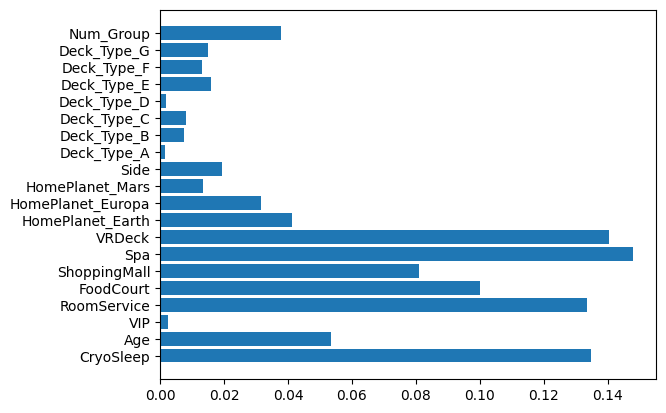

In [15]:
y = Columns
width = feature_importance
plt.barh(y=y, width=width)
#どの特徴量が重くみられているかを図式化して確認

In [18]:
from sklearn.model_selection import GridSearchCV
#GridSearchをインポート

In [19]:
param_grid = [{
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}]
#グリッドを定義

In [ ]:
tuned_model = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
#tuned_modelを定義

In [21]:
tuned_model.fit(x_train_val, y_train_val)
#tuned_modelを適用

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                              min_samples_split=10,
                                              n_estimators=300),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 10, 20],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy', verbose=1)

In [22]:
print("Best parameters:", tuned_model.best_params_)
best_rf = tuned_model.best_estimator_
#一番結果が良いモデルを確認

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [24]:
test_data = pd.read_csv('test.csv')
test_data.head()
#テストデータの読み込み・確認

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [25]:
thp_dummies = pd.get_dummies(test_data['HomePlanet'], prefix='HomePlanet')
test_data = pd.concat([test_data, thp_dummies], axis=1)

test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

test_dummies = pd.get_dummies(test_data['Deck'], prefix='Deck_Type')
test_data = pd.concat([test_data,test_dummies], axis=1)

test_data['Side'] = test_data['Side'].map({'P': 0, 'S': 1})
test_data['CryoSleep'] = test_data['CryoSleep'].astype(bool)
test_data['VIP'] = test_data['VIP'].astype(bool)

test_data.head()
#trainデータと同様に、testデータの特徴量を整理

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Num,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Deck_Type_T
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,3,1.0,False,False,False,False,False,False,True,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,4,1.0,False,False,False,False,False,True,False,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0,1.0,False,False,True,False,False,False,False,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,1.0,False,False,True,False,False,False,False,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,5,1.0,False,False,False,False,False,True,False,False


In [29]:
x_test= test_data.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'Deck','Deck_Type_T'], axis=1)

x_test['Num'] = x_test['Num'].fillna(0).astype(int)
x_test['Num_Group'] = x_test['Num'] // 100
x_test = x_test.drop(['Num'], axis =1)

x_test.head()
#引き続き特徴量を整理

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Side,Deck_Type_A,Deck_Type_B,Deck_Type_C,Deck_Type_D,Deck_Type_E,Deck_Type_F,Deck_Type_G,Num_Group
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,1.0,False,False,False,False,False,False,True,0
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,True,False,False,1.0,False,False,False,False,False,True,False,0
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,1.0,False,False,True,False,False,False,False,0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,True,False,1.0,False,False,True,False,False,False,False,0
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,True,False,False,1.0,False,False,False,False,False,True,False,0


In [34]:
x_test = x_test[x_train.columns]
#x_testのColumnをtrainと同じ順番に並べる

In [35]:
predictions = best_rf.predict(x_test)
#先ほどグリッドサーチで見つけた一番良いモデルをx_testに使用

In [36]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': predictions
})
submission.head()
#submissionデータを作成

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [37]:
submission.to_csv('submission_rf.csv', index=False)
#submissionのcsvファイルを作成
